In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.discriminant_analysis import StandardScaler
from sklearn.preprocessing import OneHotEncoder, PowerTransformer, RobustScaler

In [2]:
# importing data
data = pd.read_csv("data.csv",encoding='unicode_escape')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [4]:
data.head(5)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [5]:
data.isna().sum()


User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

In [6]:
data.drop(['Status','unnamed1','User_ID'],axis=1,inplace=True)
data.dropna(inplace=True)

In [7]:
data.shape

(11239, 12)

In [8]:
data['Amount'].dtype

dtype('float64')

In [9]:
data.describe()

,Age,Marital_Status,Orders,Amount
count,11239.000000,11239.000000,11239.000000,11239.000000
mean,35.410357,0.420055,2.489634,9453.610858
std,12.753866,0.493589,1.114967,5222.355869
min,12.000000,0.000000,1.000000,188.000000
25%,27.000000,0.000000,2.000000,5443.000000
50%,33.000000,0.000000,2.000000,8109.000000
75%,43.000000,1.000000,3.000000,12675.000000
max,92.000000,1.000000,4.000000,23952.000000


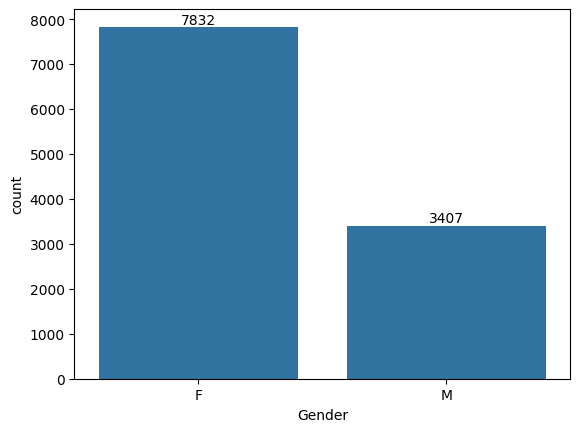

In [10]:
ax=sns.countplot(x='Gender',data=data)
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

<Axes: xlabel='Gender', ylabel='Amount'>

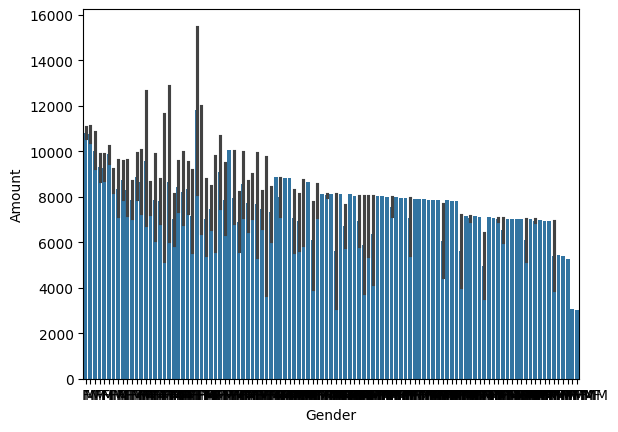

In [11]:
temp=data.groupby(['Amount'],as_index=False).sum().sort_values(by='Amount',ascending=False) 
sns.barplot(x='Gender',y='Amount',data=temp)

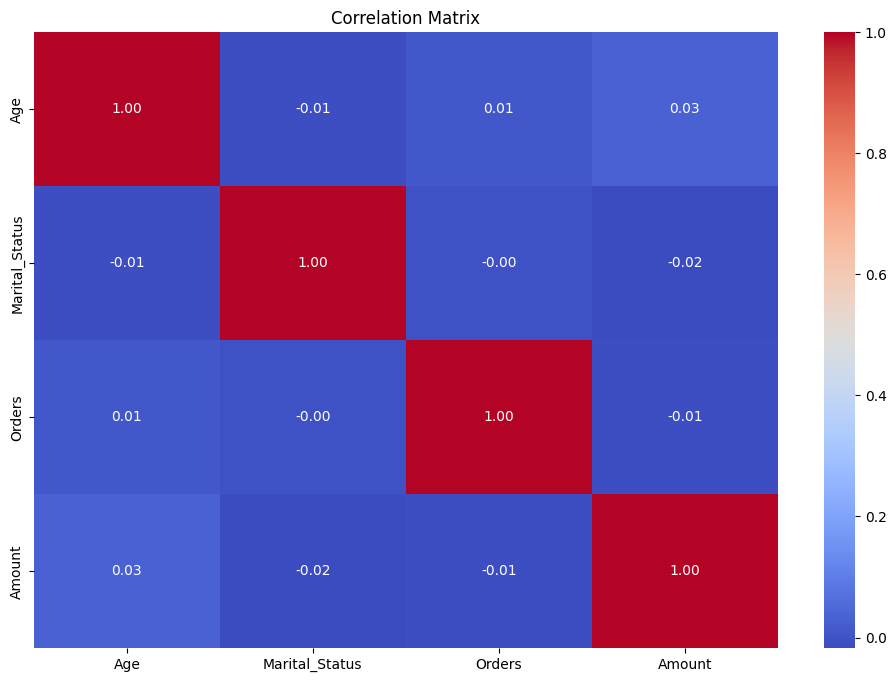

In [12]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [13]:
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()
target='Amount'

In [14]:
# convert int to float
for i in numerical_cols:
    data[i] = data[i].astype(float)

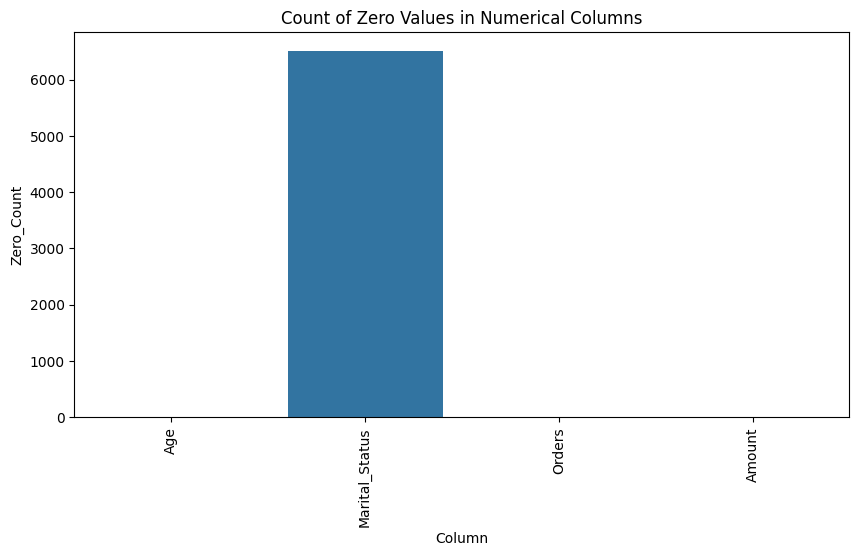

In [15]:
# Count of Zero Values in Numerical Columns
res=[]
for i in numerical_cols:
    res.append((i,data[i].value_counts().get(0,0)))
res=pd.DataFrame(res,columns=['Column','Zero_Count'])

plt.figure(figsize=(10,5))
sns.barplot(x='Column',y='Zero_Count',data=res)
plt.xticks(rotation=90)
plt.title('Count of Zero Values in Numerical Columns')
plt.show()

In [16]:
data.shape

(11239, 12)

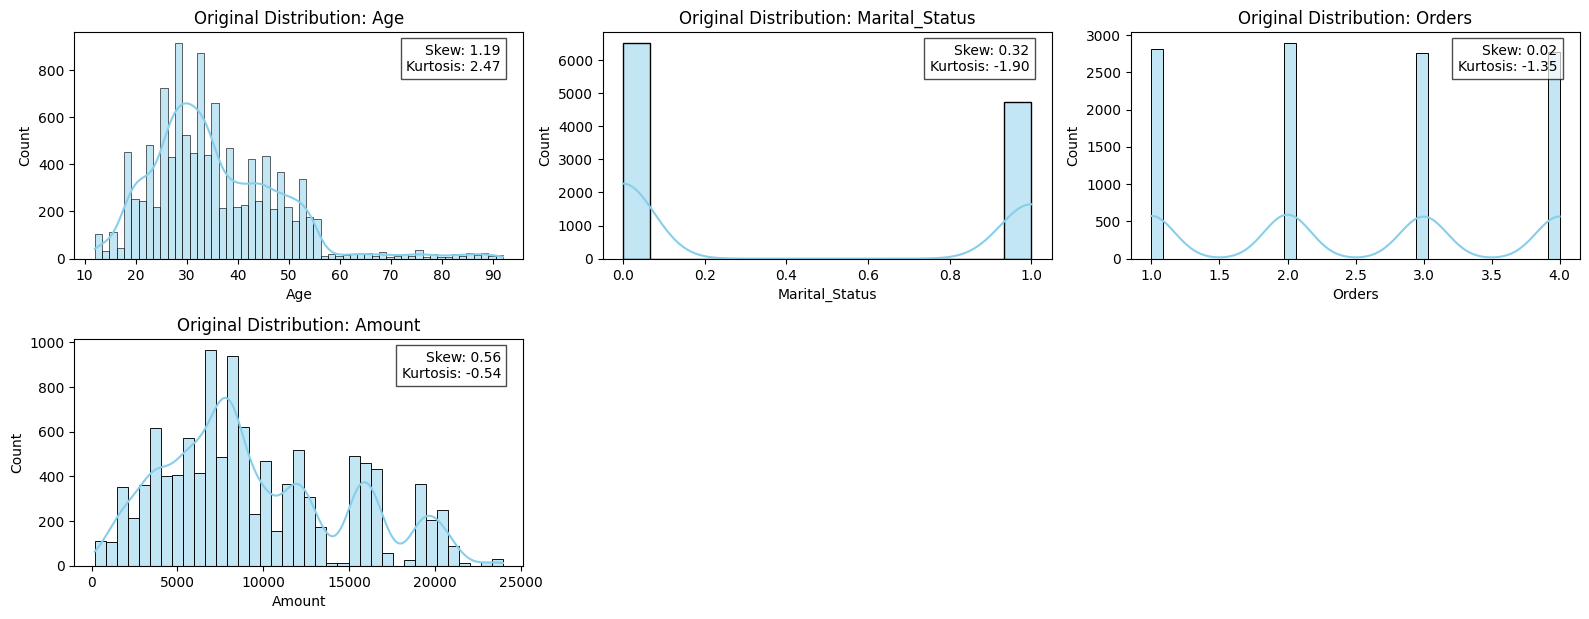

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

plt.figure(figsize=(16, len(numerical_cols)*3))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols), 3, i)
    sns.histplot(data[col], kde=True, color='skyblue', edgecolor='black')

    # Calculate skewness and kurtosis
    col_skew = skew(data[col].dropna())
    col_kurt = kurtosis(data[col].dropna())

    # Add title and text box with stats
    plt.title(f"Original Distribution: {col}")
    plt.xlabel(col)
    plt.ylabel("Count")

    # Add skew/kurtosis info to plot
    plt.text(0.95, 0.95,
             f"Skew: {col_skew:.2f}\nKurtosis: {col_kurt:.2f}",
             horizontalalignment='right',
             verticalalignment='top',
             transform=plt.gca().transAxes,
             fontsize=10,
             bbox=dict(facecolor='white', alpha=0.7, edgecolor='black'))

plt.tight_layout()
plt.show()


In [18]:

low_cardinality_numerical = [col for col in numerical_cols if data[col].nunique() <= 10]
binary_cols = [col for col in numerical_cols if data[col].nunique() == 2]
true_numerical_cols = [col for col in numerical_cols if col not in low_cardinality_numerical + binary_cols]
for col in true_numerical_cols:
    col_skew = skew(data[col].dropna())

    if abs(col_skew) < 0.5:
        scaler = StandardScaler()
    elif abs(col_skew) <= 1.5:
        scaler = PowerTransformer(method='yeo-johnson')
    else:
        scaler = RobustScaler()

    data[col] = scaler.fit_transform(data[[col]])
    print(f"{col}: Scaled using {scaler.__class__.__name__} (Skew={col_skew:.2f})")

Age: Scaled using PowerTransformer (Skew=1.19)
Amount: Scaled using PowerTransformer (Skew=0.56)


In [19]:
data.shape

(11239, 12)

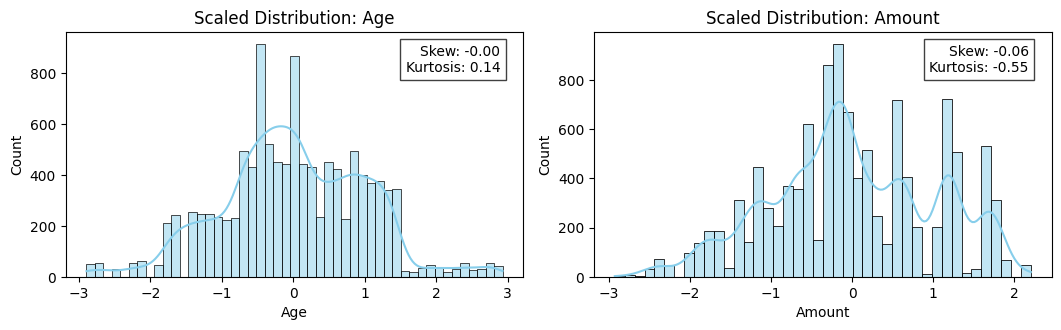

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

# List only the columns that were scaled (i.e., true_numerical_cols)
plt.figure(figsize=(16, len(true_numerical_cols)*3))

for i, col in enumerate(true_numerical_cols, 1):
    plt.subplot(len(true_numerical_cols), 3, i)
    sns.histplot(data[col], kde=True, color='skyblue', edgecolor='black')

    # Recompute skewness and kurtosis after scaling
    col_skew = skew(data[col].dropna())
    col_kurt = kurtosis(data[col].dropna())

    plt.title(f"Scaled Distribution: {col}")
    plt.xlabel(col)
    plt.ylabel("Count")

    # Add stats box
    plt.text(0.95, 0.95,
             f"Skew: {col_skew:.2f}\nKurtosis: {col_kurt:.2f}",
             horizontalalignment='right',
             verticalalignment='top',
             transform=plt.gca().transAxes,
             fontsize=10,
             bbox=dict(facecolor='white', alpha=0.75, edgecolor='black'))

plt.tight_layout()
plt.show()


In [21]:
from sklearn.preprocessing import LabelEncoder

# Step 1: Identify object-type columns
object_cols = data.select_dtypes(include='object').columns.tolist()

# Step 2: Label encode each object column
label_encoders = {}

for col in object_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))  # ensure string type
    label_encoders[col] = le  # store encoder in case needed later
    print(f"{col}: label-encoded and converted to numeric.")


Cust_name: label-encoded and converted to numeric.
Product_ID: label-encoded and converted to numeric.
Gender: label-encoded and converted to numeric.
Age Group: label-encoded and converted to numeric.
State: label-encoded and converted to numeric.
Zone: label-encoded and converted to numeric.
Occupation: label-encoded and converted to numeric.
Product_Category: label-encoded and converted to numeric.


In [22]:
data.dtypes

Cust_name             int64
Product_ID            int64
Gender                int64
Age Group             int64
Age                 float64
Marital_Status      float64
State                 int64
Zone                  int64
Occupation            int64
Product_Category      int64
Orders              float64
Amount              float64
dtype: object

<Axes: title={'center': 'Feature Importance'}>

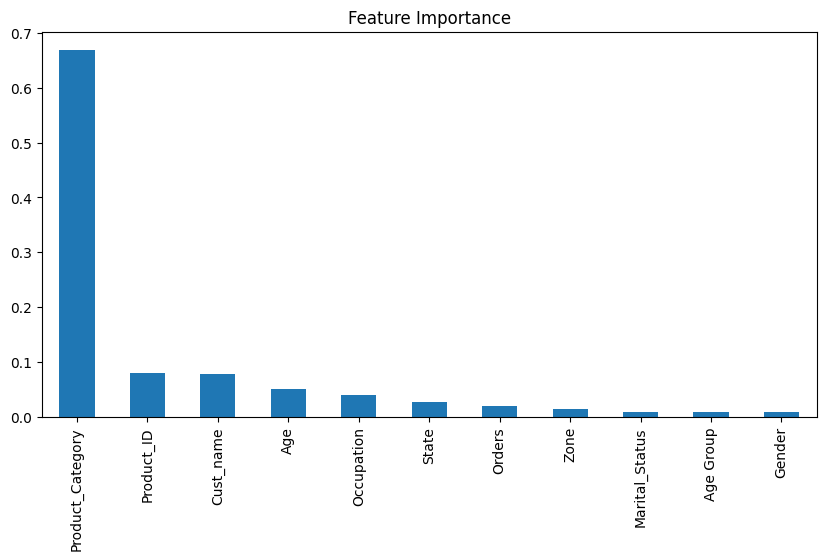

In [23]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(data.drop(columns=target), data[target])

importance = pd.Series(model.feature_importances_, index=data.drop(columns=target).columns)
importance.sort_values(ascending=False).plot(kind='bar', figsize=(10, 5), title='Feature Importance')


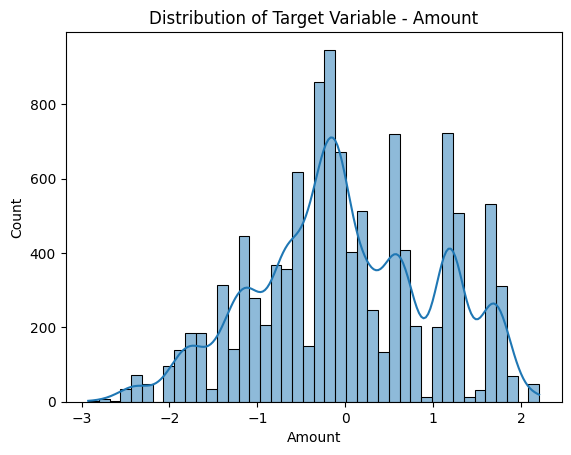

In [24]:
sns.histplot(data[target], kde=True)
plt.title('Distribution of Target Variable - Amount')
plt.show()

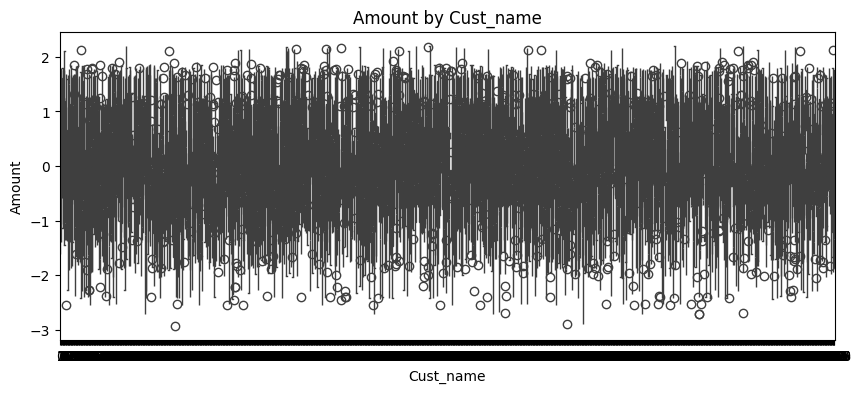

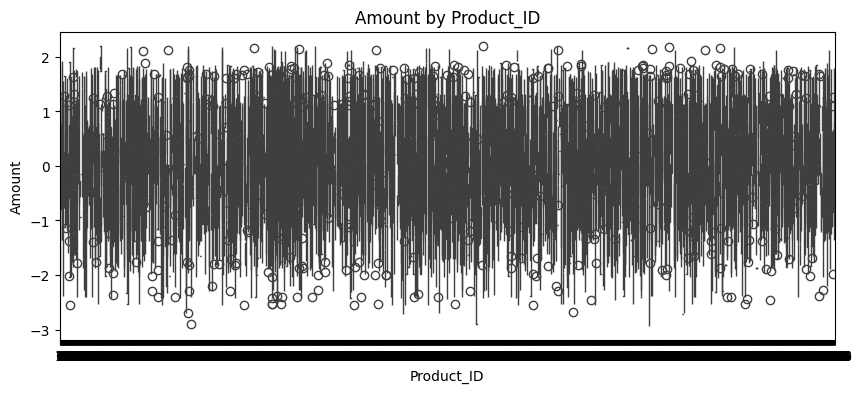

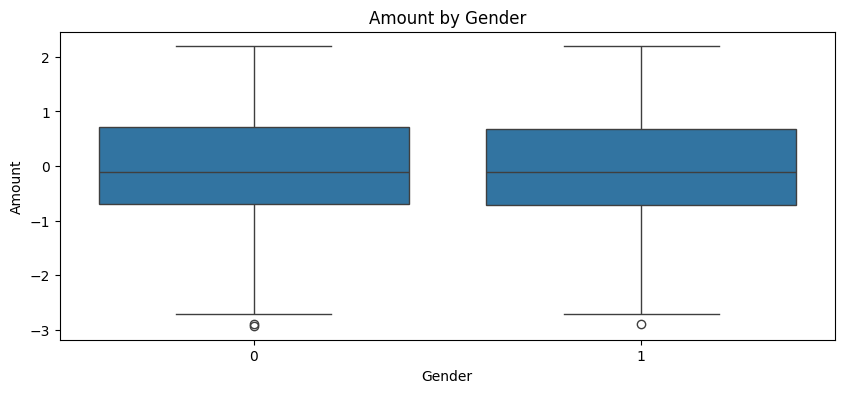

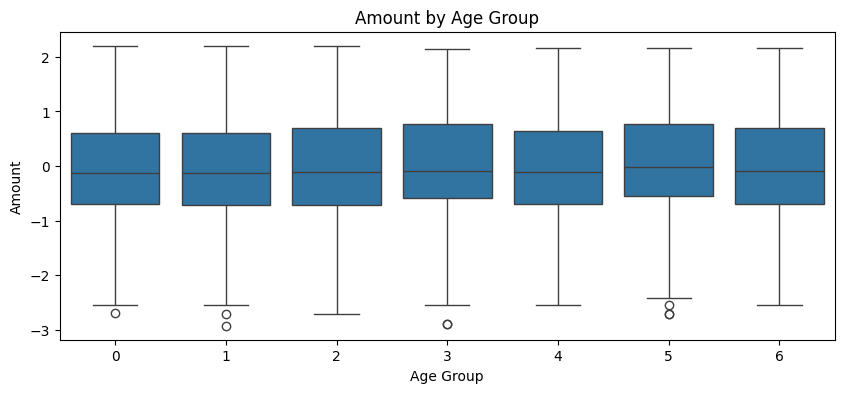

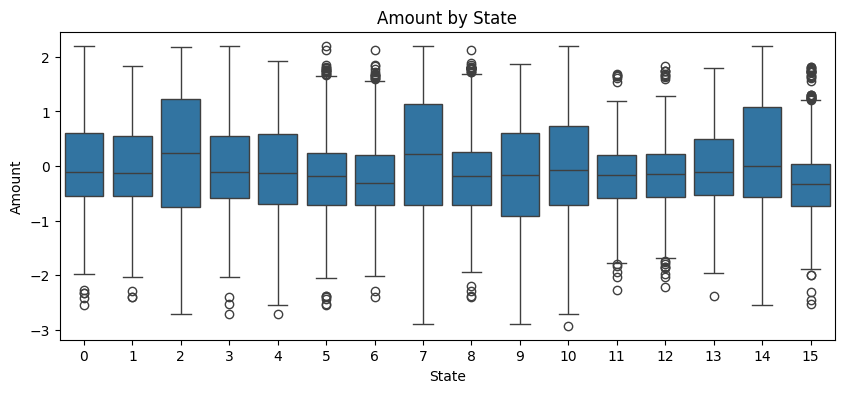

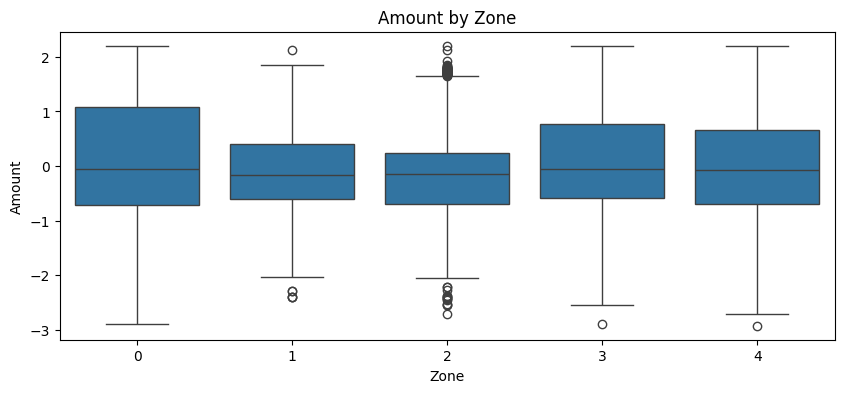

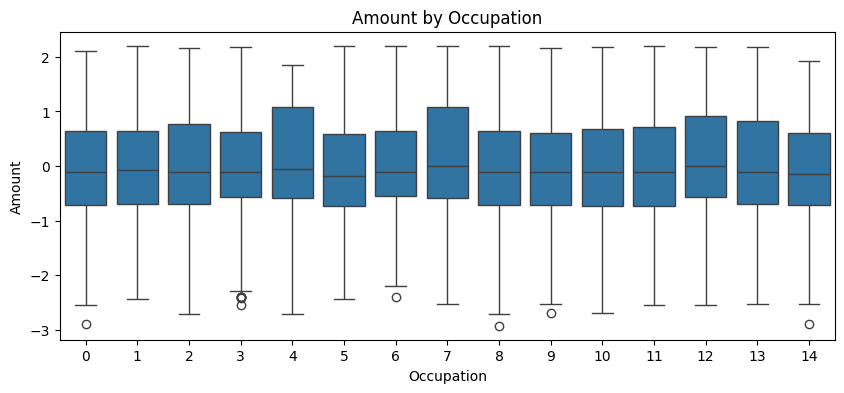

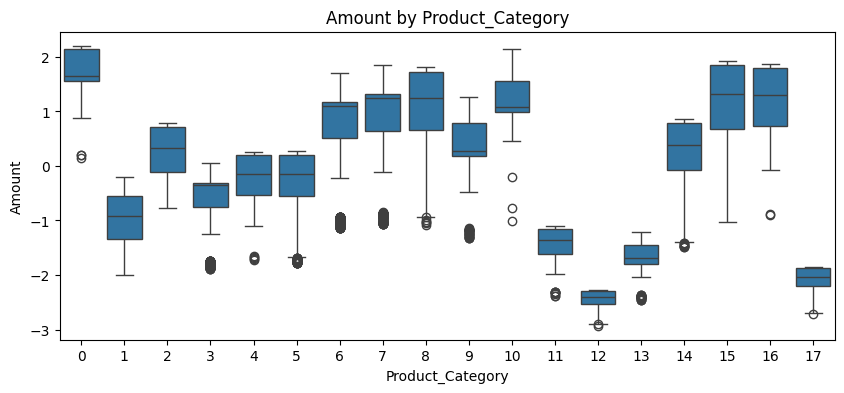

In [25]:
for cat in categorical_cols:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=cat, y=target, data=data)
    plt.title(f'{target} by {cat}')
    plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


None

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

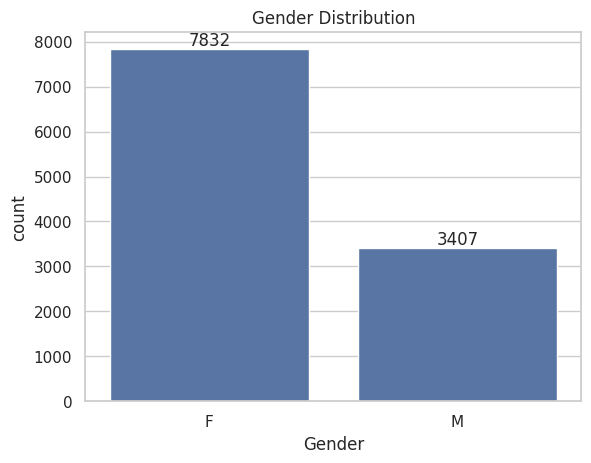

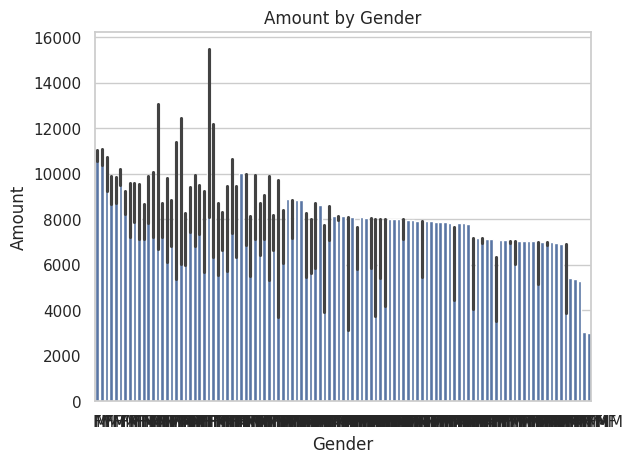

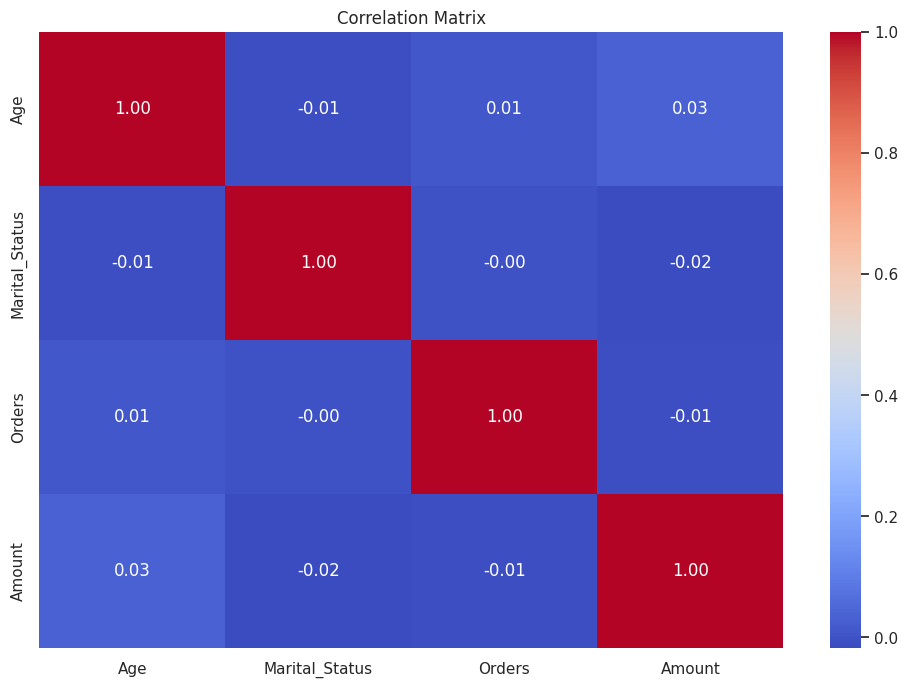

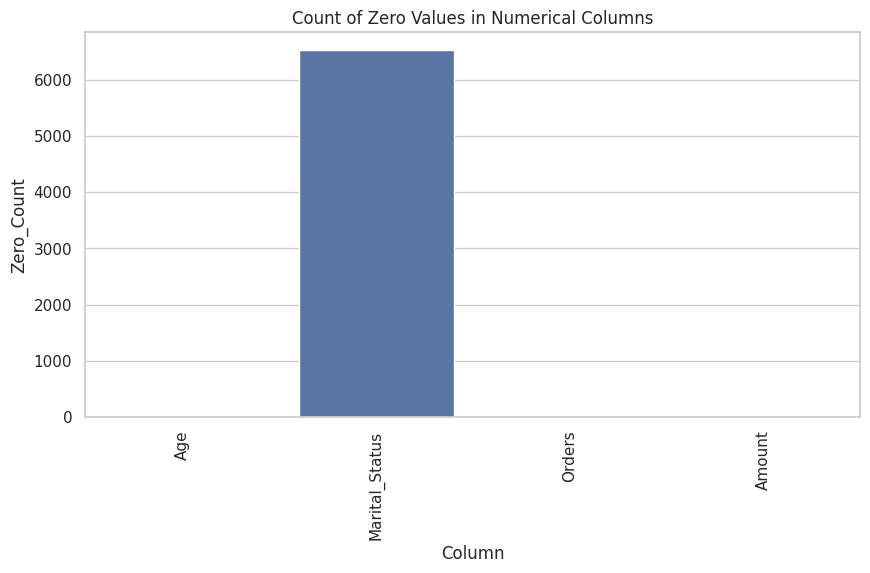

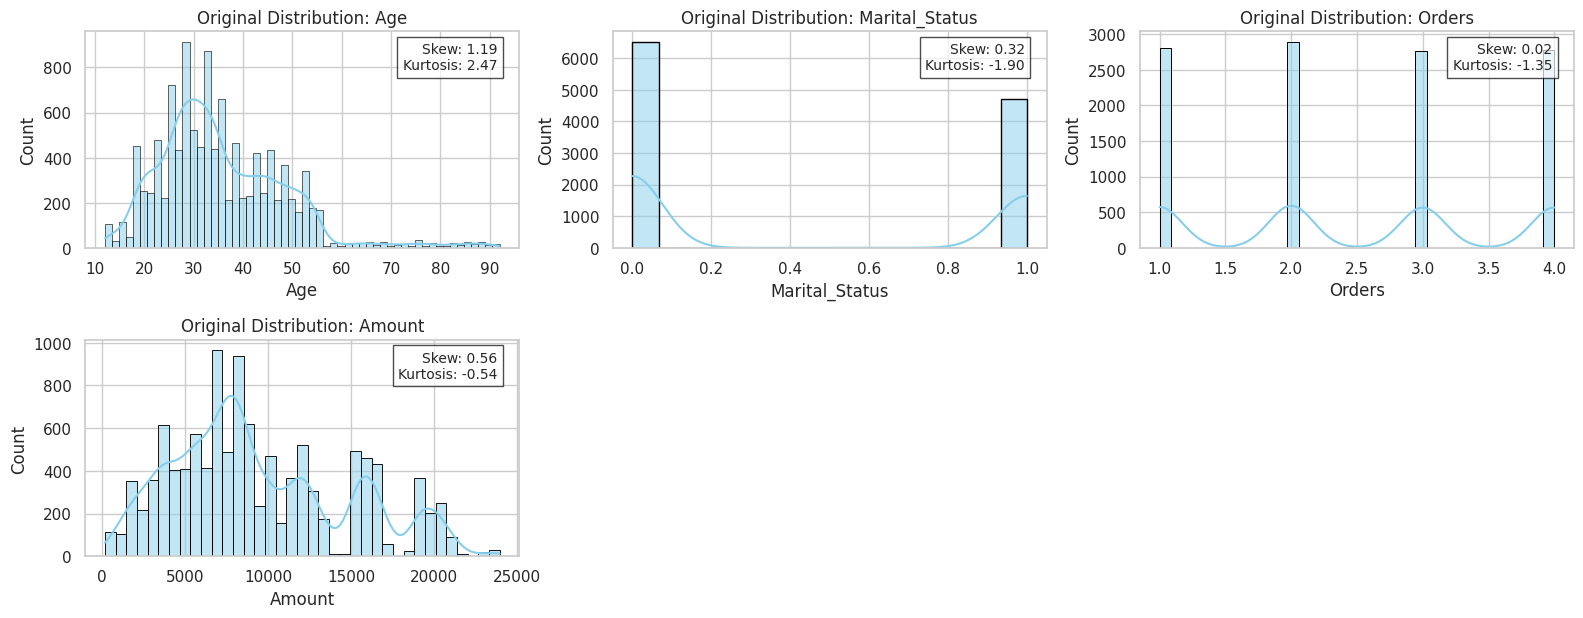

Age: Scaled using PowerTransformer (Skew=1.19)
Amount: Scaled using PowerTransformer (Skew=0.56)


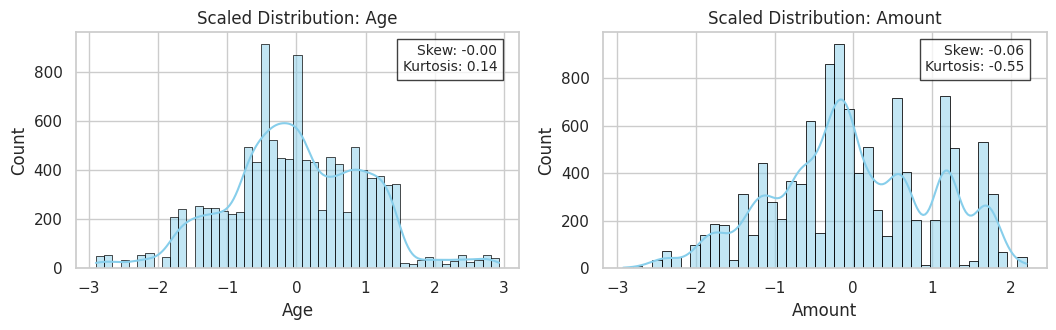

Cust_name: label-encoded and converted to numeric.
Product_ID: label-encoded and converted to numeric.
Gender: label-encoded and converted to numeric.
Age Group: label-encoded and converted to numeric.
State: label-encoded and converted to numeric.
Zone: label-encoded and converted to numeric.
Occupation: label-encoded and converted to numeric.
Product_Category: label-encoded and converted to numeric.


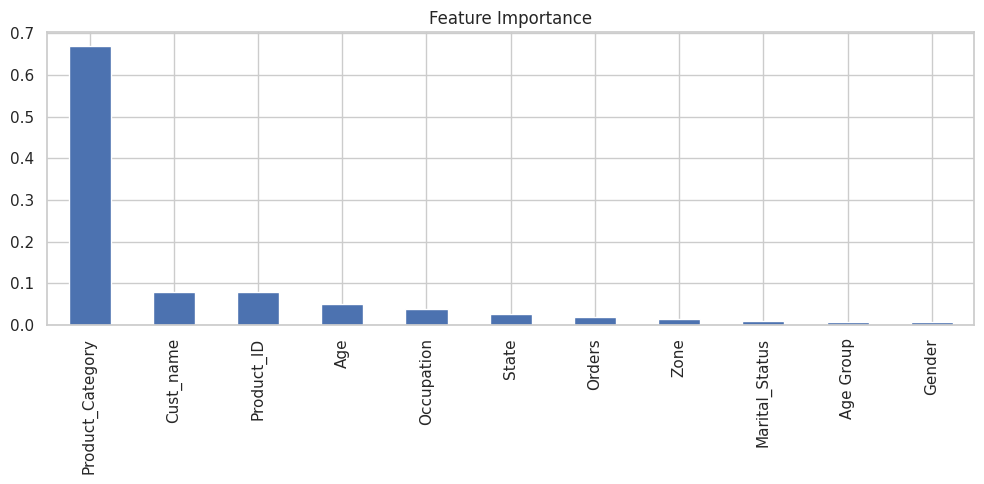

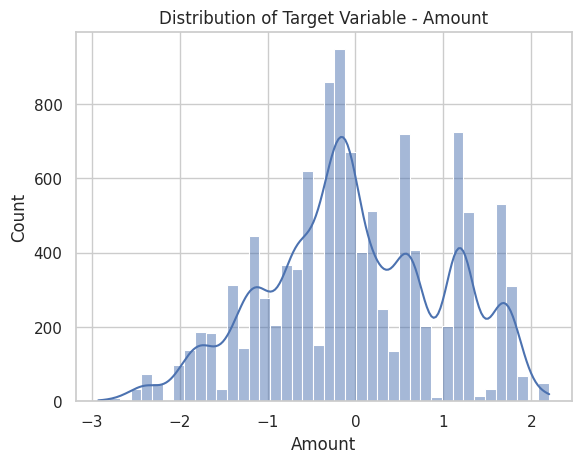

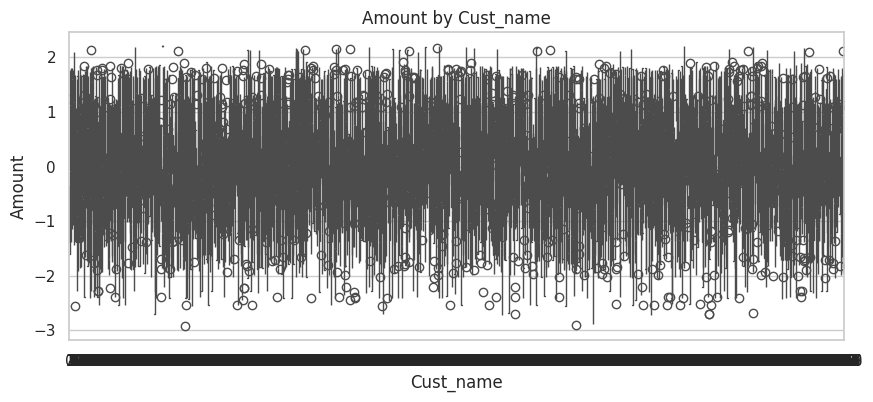

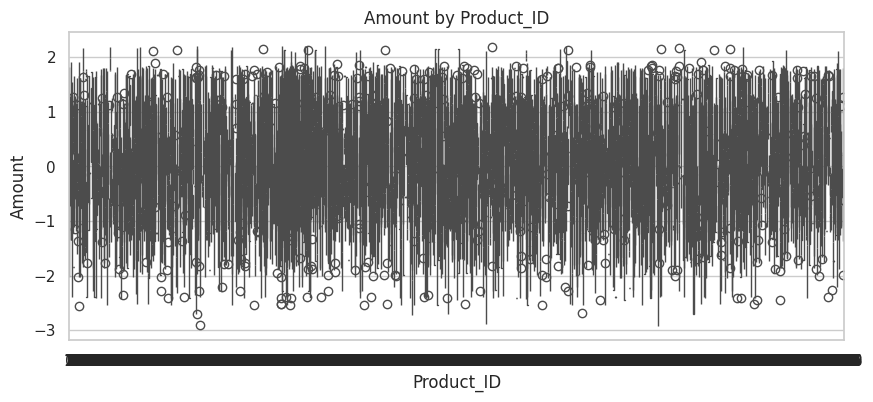

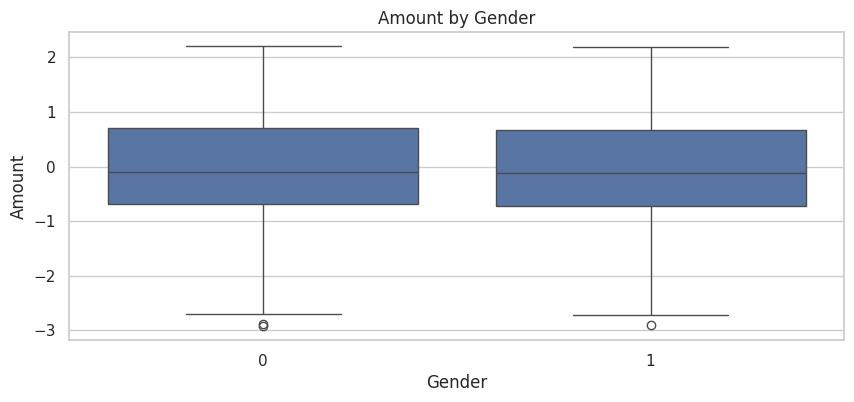

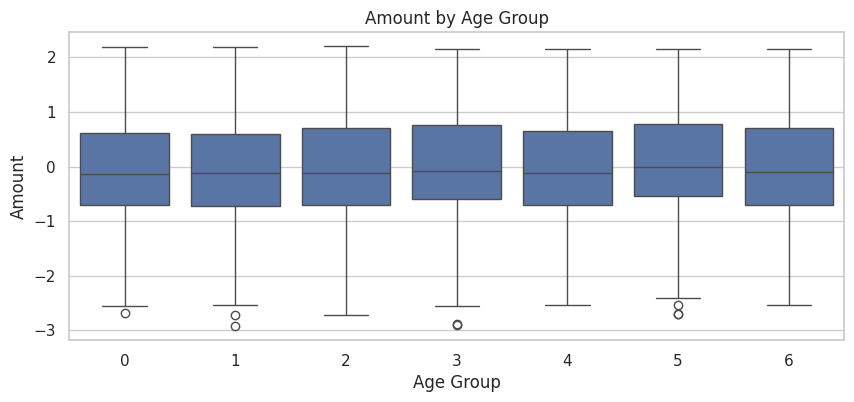

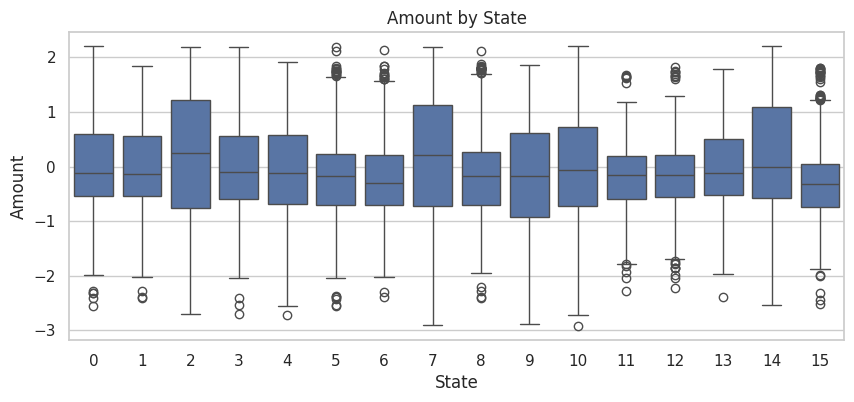

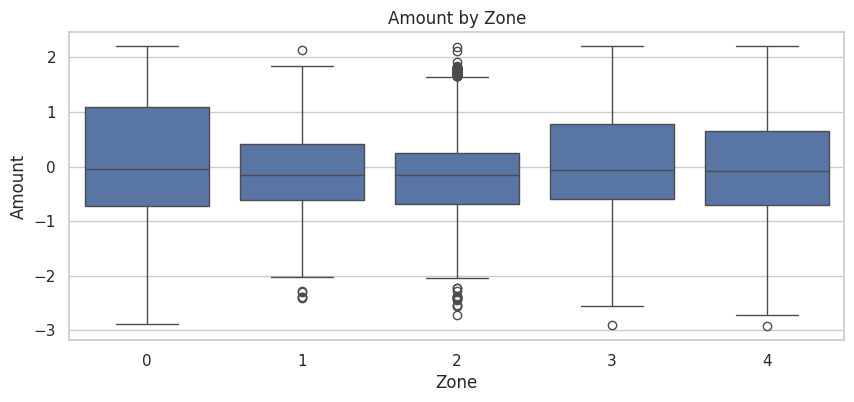

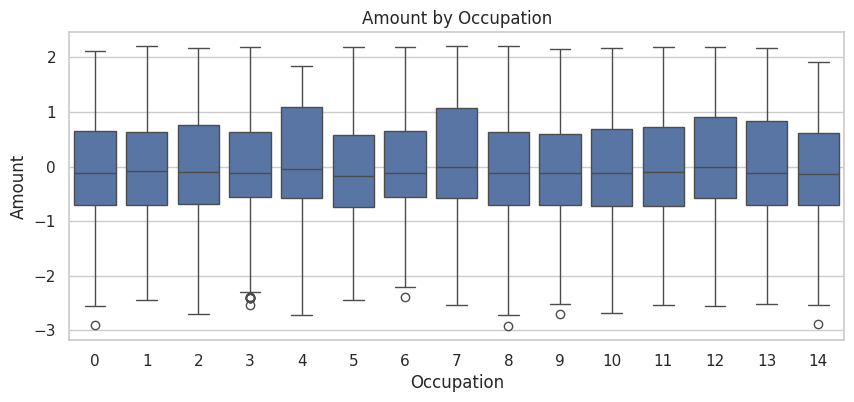

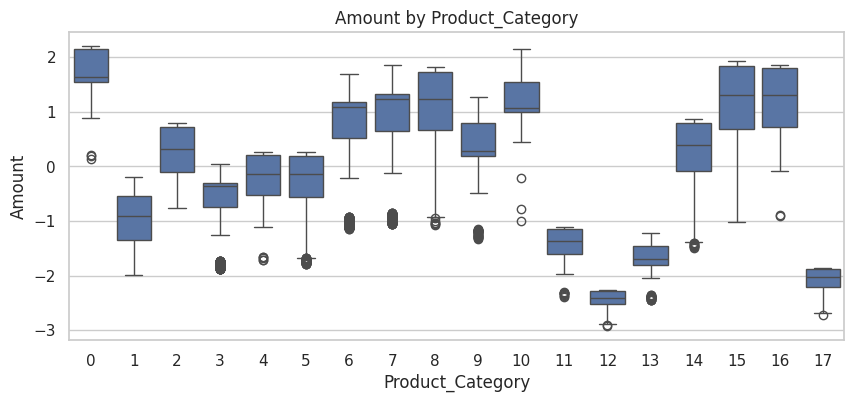

In [26]:
# EDA for Amount Prediction Dataset (Jupyter Notebook Version)

# 1. Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
from sklearn.preprocessing import StandardScaler, PowerTransformer, RobustScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor

# Inline plots
%matplotlib inline
sns.set(style="whitegrid")

# 2. Load data
data = pd.read_csv("data.csv", encoding='unicode_escape')
display(data.info())
display(data.head())
display(data.isna().sum())

# 3. Drop unwanted columns and rows with missing values
data.drop(['Status', 'unnamed1', 'User_ID'], axis=1, inplace=True)
data.dropna(inplace=True)

# 4. Countplot of Gender
plt.figure()
ax = sns.countplot(x='Gender', data=data)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Gender Distribution")
plt.show()

# 5. Amount by Gender
temp = data.groupby(['Amount'], as_index=False).sum().sort_values(by='Amount', ascending=False)
plt.figure()
sns.barplot(x='Gender', y='Amount', data=temp)
plt.title("Amount by Gender")
plt.show()

# 6. Correlation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# 7. Define column types
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()
target = 'Amount'

# convert all to float
for i in numerical_cols:
    data[i] = data[i].astype(float)

# 8. Count of Zero Values
res = []
for i in numerical_cols:
    res.append((i, data[i].value_counts().get(0, 0)))
res = pd.DataFrame(res, columns=['Column', 'Zero_Count'])

plt.figure(figsize=(10, 5))
sns.barplot(x='Column', y='Zero_Count', data=res)
plt.xticks(rotation=90)
plt.title('Count of Zero Values in Numerical Columns')
plt.show()

# 9. Original Distributions with Skew and Kurtosis
plt.figure(figsize=(16, len(numerical_cols) * 3))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols), 3, i)
    sns.histplot(data[col], kde=True, color='skyblue', edgecolor='black')
    col_skew = skew(data[col].dropna())
    col_kurt = kurtosis(data[col].dropna())
    plt.title(f"Original Distribution: {col}")
    plt.text(0.95, 0.95,
             f"Skew: {col_skew:.2f}\nKurtosis: {col_kurt:.2f}",
             horizontalalignment='right', verticalalignment='top',
             transform=plt.gca().transAxes,
             fontsize=10,
             bbox=dict(facecolor='white', alpha=0.7, edgecolor='black'))
plt.tight_layout()
plt.show()

# 10. Scaling based on Skewness
low_cardinality_numerical = [col for col in numerical_cols if data[col].nunique() <= 10]
binary_cols = [col for col in numerical_cols if data[col].nunique() == 2]
true_numerical_cols = [col for col in numerical_cols if col not in low_cardinality_numerical + binary_cols]

for col in true_numerical_cols:
    col_skew = skew(data[col].dropna())
    if abs(col_skew) < 0.5:
        scaler = StandardScaler()
    elif abs(col_skew) <= 1.5:
        scaler = PowerTransformer(method='yeo-johnson')
    else:
        scaler = RobustScaler()
    data[col] = scaler.fit_transform(data[[col]])
    print(f"{col}: Scaled using {scaler.__class__.__name__} (Skew={col_skew:.2f})")

# 11. Scaled Distributions
plt.figure(figsize=(16, len(true_numerical_cols) * 3))
for i, col in enumerate(true_numerical_cols, 1):
    plt.subplot(len(true_numerical_cols), 3, i)
    sns.histplot(data[col], kde=True, color='skyblue', edgecolor='black')
    col_skew = skew(data[col].dropna())
    col_kurt = kurtosis(data[col].dropna())
    plt.title(f"Scaled Distribution: {col}")
    plt.text(0.95, 0.95,
             f"Skew: {col_skew:.2f}\nKurtosis: {col_kurt:.2f}",
             horizontalalignment='right', verticalalignment='top',
             transform=plt.gca().transAxes,
             fontsize=10,
             bbox=dict(facecolor='white', alpha=0.75, edgecolor='black'))
plt.tight_layout()
plt.show()

# 12. Label Encoding of Categorical Columns
object_cols = data.select_dtypes(include='object').columns.tolist()
label_encoders = {}

for col in object_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))
    label_encoders[col] = le
    print(f"{col}: label-encoded and converted to numeric.")

# 13. Feature Importance using Random Forest
model = RandomForestRegressor()
model.fit(data.drop(columns=target), data[target])

importance = pd.Series(model.feature_importances_, index=data.drop(columns=target).columns)
plt.figure(figsize=(10, 5))
importance.sort_values(ascending=False).plot(kind='bar', title='Feature Importance')
plt.tight_layout()
plt.show()

# 14. Target Variable Distribution
sns.histplot(data[target], kde=True)
plt.title('Distribution of Target Variable - Amount')
plt.show()

# 15. Boxplots of Categorical Variables vs Target
for cat in categorical_cols:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=cat, y=target, data=data)
    plt.title(f'{target} by {cat}')
    plt.show()
